<a href="https://colab.research.google.com/github/hvyrain/imis/blob/main/2023_2%EB%B9%85%ED%94%84%EA%B8%B0_%EC%A2%85%ED%95%A9%EB%B3%B5%EC%8A%B5_tips%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tips 데이터 셋을 이용한 데이터 분석
- tips : seaborn 내장 데이터
 - 시각화, 통계, 머신러닝 등 각종 학습의 데이터로 많이 사용된다.
 - 각 열(필드)의 의미를 [챗GPT](https://chat.openai.com/)에서 알아 본다.
 - 참고 사이트 : https://wikidocs.net/book/5011
- 기타 내장 데이터셋 목록 보기 : sns.get_dataset_names()
 - 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic'

## 차트에 한글 사용 설정
- 아래 쉘(shell) 명령어가 입력된 셀을 실행한 후 "런타임-런타임다시시작" 메뉴를 선택한다.

In [ ]:
%%shell
sudo apt-get install -y fonts-nanum*
sudo fc-cache -fv
rm ~/.cache/matplotlib -rf
# 설치 글꼴 목록 보기 : fc-list | grep -i nanum

In [ ]:
# 한글 글꼴 지정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic', size=14)
plt.rcParams['axes.unicode_minus'] = False

## tips 데이터셋 저장
- 아래 구조의 데이터셋을 불러와서 CSV 파일로 저장한다.

|연번|total_bill|tip|sex|smoker|day|time|size|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|정수|실수|실수|str|str|str|str|정수|
|0~244|금액|팁|Male/Female|Yes/No|Thus/Fri/Sat/Sun|Lunch/Dinner|1~6|

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.to_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## csv 모듈 사용

### 데이터 파일 읽기

In [ ]:
# 데이터 파일 읽기
import csv
data = csv.reader(open('tips.csv'))
header = next(data)
print(header)

['', 'total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


### 데이터 처리하기
- total_bill과 tip 데이터를 반복하여 가져오기

In [ ]:
# total_bill과 tip 데이터를 반복하여 가져오기
bill = []
tip = []
for row in data :
  bill.append(float(row[1]))
  tip.append(float(row[2]))

print(bill)
print(tip)

[16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.77, 26.88, 15.04, 14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29, 16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37, 12.69, 21.7, 19.65, 9.55, 18.35, 15.06, 20.69, 17.78, 24.06, 16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94, 9.68, 30.4, 18.29, 22.23, 32.4, 28.55, 18.04, 12.54, 10.29, 34.81, 9.94, 25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02, 18.29, 17.59, 20.08, 16.45, 3.07, 20.23, 15.01, 12.02, 17.07, 26.86, 25.28, 14.73, 10.51, 17.92, 27.2, 22.76, 17.29, 19.44, 16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16, 28.97, 22.49, 5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01, 12.46, 11.35, 15.38, 44.3, 22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.0, 7.25, 38.07, 23.95, 25.71, 17.31, 29.93, 10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8, 8.52, 14.52, 11.38, 22.82, 19.08, 20.27, 11.17, 12.26, 18.26, 8.51, 10.33, 14.15, 16.0, 13.16, 17.47, 34.3, 41.19, 27.05, 16.43, 8.

### 결제금액, 팁 라인차트 그리기
- 라인 스타일 및 색상 : https://wikidocs.net/92083
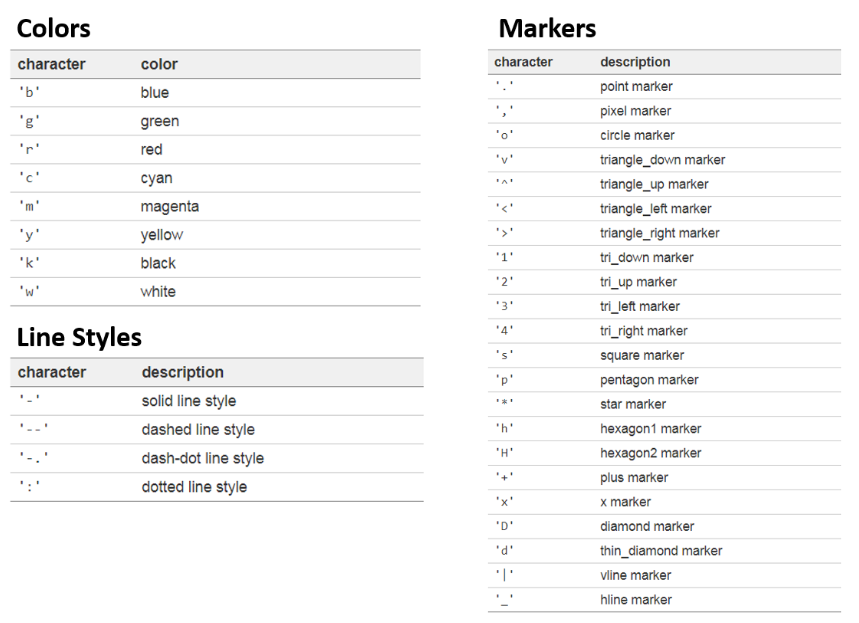

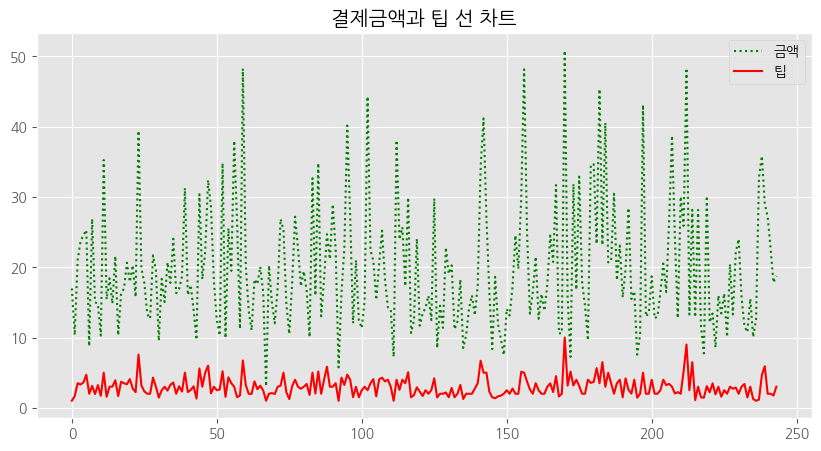

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('결제금액과 팁 선 차트')
plt.grid(True)
plt.plot(range(len(bill)), bill, 'g:', label='금액')
plt.plot(range(len(tip)), tip, 'r', label='팁')
plt.legend()
plt.show()

### 상자수염그림

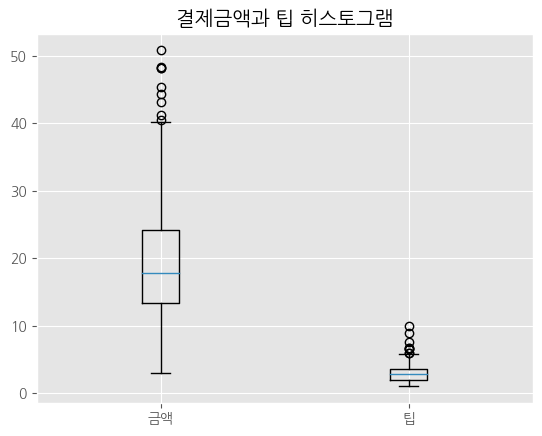

In [ ]:
import matplotlib.pyplot as plt
plt.title('결제금액과 팁 히스토그램')
plt.grid(True)
plt.boxplot([bill, tip], labels=['금액','팁'])
plt.show()

In [ ]:
# 성별 팁 상자수염그림
import csv
data = csv.reader(open('tips.csv'))
header = next(data)
gender_bill = [[],[]]
gender_tip = [[],[]]

for row in data :
  if row[3] == 'Male' :
    gender_bill[0].append(float(row[1]))
    gender_tip[0].append(float(row[2]))
  else :
    gender_bill[1].append(float(row[1]))
    gender_tip[1].append(float(row[2]))

print(gender_bill, gender_tip)

[[10.34, 21.01, 23.68, 25.29, 8.77, 26.88, 15.04, 14.78, 10.27, 15.42, 18.43, 21.58, 16.29, 20.65, 17.92, 39.42, 19.82, 17.81, 13.37, 12.69, 21.7, 9.55, 18.35, 17.78, 24.06, 16.31, 18.69, 31.27, 16.04, 17.46, 13.94, 9.68, 30.4, 18.29, 22.23, 32.4, 28.55, 18.04, 12.54, 9.94, 25.56, 19.49, 38.01, 11.24, 48.27, 20.29, 13.81, 11.02, 18.29, 17.59, 20.08, 20.23, 15.01, 12.02, 10.51, 17.92, 27.2, 22.76, 17.29, 19.44, 16.66, 32.68, 15.98, 13.03, 18.28, 24.71, 21.16, 28.97, 22.49, 40.17, 27.28, 12.03, 21.01, 12.46, 15.36, 20.49, 25.21, 18.24, 14.0, 38.07, 23.95, 29.93, 11.69, 14.26, 15.95, 8.52, 22.82, 19.08, 16.0, 34.3, 41.19, 9.78, 7.51, 14.07, 13.13, 17.26, 24.55, 19.77, 48.17, 16.49, 21.5, 12.66, 13.81, 24.52, 20.76, 31.71, 50.81, 15.81, 7.25, 31.85, 16.82, 32.9, 17.89, 14.48, 34.63, 34.65, 23.33, 45.35, 23.17, 40.55, 20.69, 30.46, 23.1, 15.69, 28.44, 15.48, 16.58, 7.56, 10.34, 13.51, 18.71, 20.53, 26.59, 38.73, 24.27, 30.06, 25.89, 48.33, 28.15, 11.59, 7.74, 12.16, 8.58, 13.42, 20.45, 13.2

In [ ]:
# 성별 금액과 팁 구하기
mBill = sum(gender_bill[0]) / len(gender_bill[0])
fBill = sum(gender_bill[1]) / len(gender_bill[1])
mTip = sum(gender_tip[0]) / len(gender_tip[0])
fTip = sum(gender_tip[1]) / len(gender_tip[1])
print(f'남평균:${mBill:.1f}, 여평균:${fBill:.1f}, 남팁:${mTip:.1f}, 여팁:${fTip:.1f}')

남평균:$20.7,여평균:$18.1,남팁:$3.1,여팁:$2.8


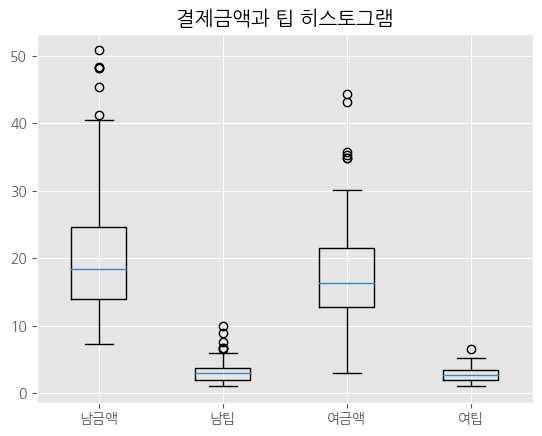

In [ ]:
import matplotlib.pyplot as plt
plt.title('결제금액과 팁 히스토그램')
plt.grid(True)
plt.boxplot([gender_bill[0], gender_tip[0], gender_bill[1], gender_tip[1]],
            labels=['남금액','남팁','여금액','여팁'])
plt.show()

### 히스토그램 그리기

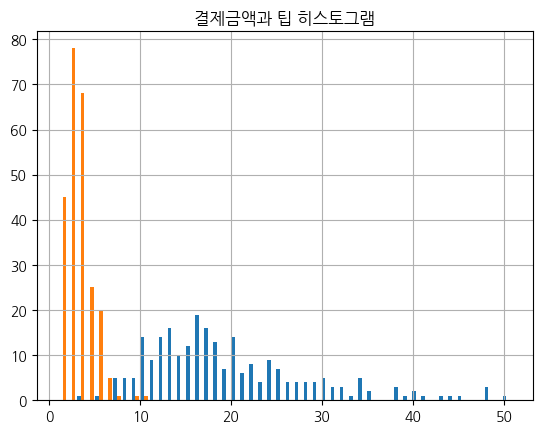

In [ ]:
import matplotlib.pyplot as plt
plt.title('결제금액과 팁 히스토그램')
plt.grid(True)
plt.hist([bill, tip], bins=50)
plt.show()

남: 157 여: 87


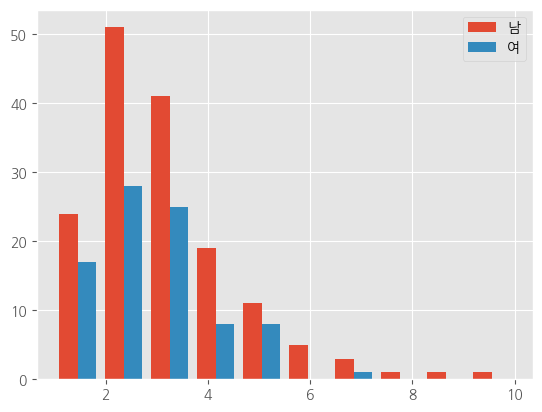

In [ ]:
# 성별 팀 수
print('남:', len(gender_tip[0]), '여:', len(gender_tip[1]))
# 성별 팁 히스토그램
plt.hist(gender_tip, bins=10, label=['남','여'])
plt.legend()

### 성별 결제금액 막대 차트

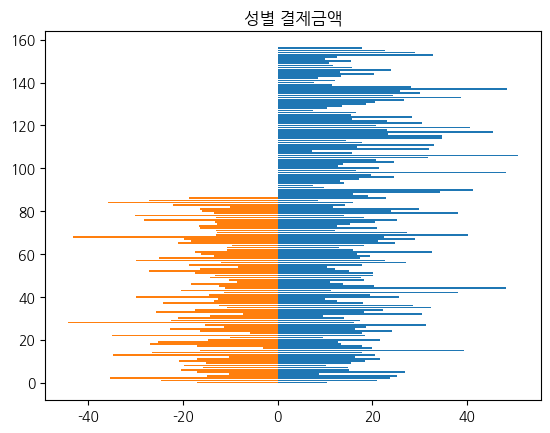

In [ ]:
import matplotlib.pyplot as plt
fbill1 = []
for i in fbill :
  fbill1.append(-i)

plt.title('성별 결제금액')
plt.barh(range(len(mbill)), mbill)
plt.barh(range(len(fbill1)), fbill1)
plt.show()

### 산점도 그리기

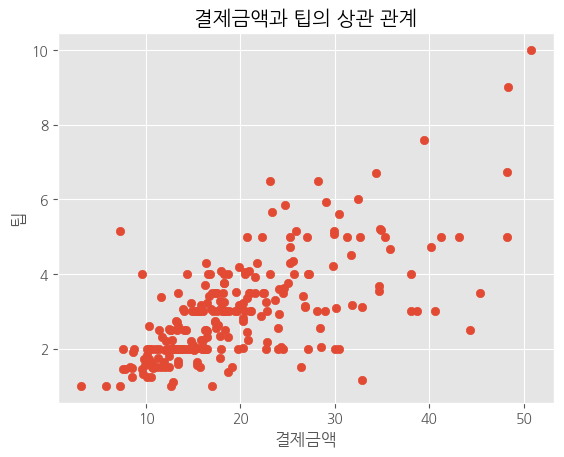

In [ ]:
# 산점도 그리기
import matplotlib.pyplot as plt
plt.title('결제금액과 팁의 상관 관계')
plt.scatter(bill, tip)
plt.xlabel('결제금액')
plt.ylabel('팁')
plt.show()

### 성별 결제금액-팁 산점도와 파이차트

In [ ]:
# total_bill과 tip 데이터를 반복하여 가져오기
mbill = []
mtip = []
fbill = []
ftip = []

for row in data :
  if row[3] == 'Male' :
    mbill.append(float(row[1]))
    mtip.append(float(row[2]))
  if row[3] == 'Female' :
    fbill.append(float(row[1]))
    ftip.append(float(row[2]))

print(mbill)
print(mtip)

[10.34, 21.01, 23.68, 25.29, 8.77, 26.88, 15.04, 14.78, 10.27, 15.42, 18.43, 21.58, 16.29, 20.65, 17.92, 39.42, 19.82, 17.81, 13.37, 12.69, 21.7, 9.55, 18.35, 17.78, 24.06, 16.31, 18.69, 31.27, 16.04, 17.46, 13.94, 9.68, 30.4, 18.29, 22.23, 32.4, 28.55, 18.04, 12.54, 9.94, 25.56, 19.49, 38.01, 11.24, 48.27, 20.29, 13.81, 11.02, 18.29, 17.59, 20.08, 20.23, 15.01, 12.02, 10.51, 17.92, 27.2, 22.76, 17.29, 19.44, 16.66, 32.68, 15.98, 13.03, 18.28, 24.71, 21.16, 28.97, 22.49, 40.17, 27.28, 12.03, 21.01, 12.46, 15.36, 20.49, 25.21, 18.24, 14.0, 38.07, 23.95, 29.93, 11.69, 14.26, 15.95, 8.52, 22.82, 19.08, 16.0, 34.3, 41.19, 9.78, 7.51, 14.07, 13.13, 17.26, 24.55, 19.77, 48.17, 16.49, 21.5, 12.66, 13.81, 24.52, 20.76, 31.71, 50.81, 15.81, 7.25, 31.85, 16.82, 32.9, 17.89, 14.48, 34.63, 34.65, 23.33, 45.35, 23.17, 40.55, 20.69, 30.46, 23.1, 15.69, 28.44, 15.48, 16.58, 7.56, 10.34, 13.51, 18.71, 20.53, 26.59, 38.73, 24.27, 30.06, 25.89, 48.33, 28.15, 11.59, 7.74, 12.16, 8.58, 13.42, 20.45, 13.28

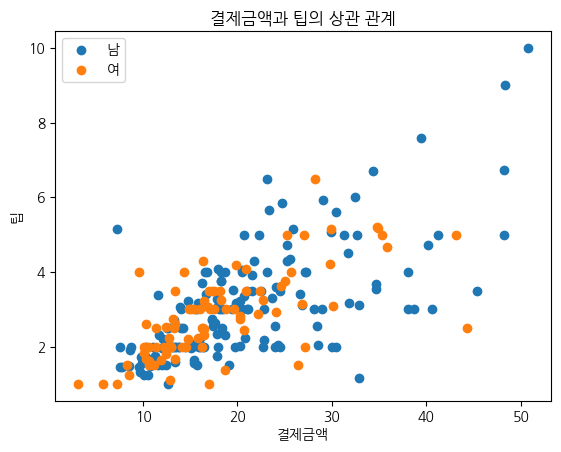

In [ ]:
# 산점도 그리기
import matplotlib.pyplot as plt
plt.title('결제금액과 팁의 상관 관계')
plt.scatter(mbill, mtip, label='남')
plt.scatter(fbill, ftip, label='여')
plt.legend()
plt.xlabel('결제금액')
plt.ylabel('팁')
plt.show()

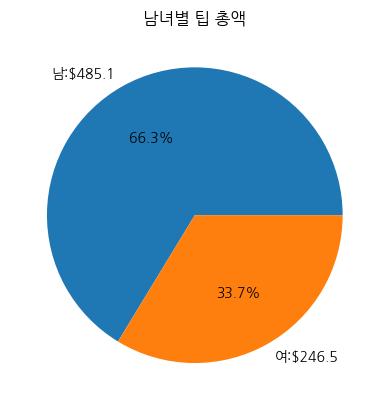

In [ ]:
# 성별 팁 파이차트 그리기
import matplotlib.pyplot as plt
plt.title('남녀별 팁 총액')
plt.pie([sum(mtip), sum(ftip)], labels=['남:$'+f'{sum(mtip):.1f}','여:$'+f'{sum(ftip):.1f}'], autopct='%.1f%%')
plt.show()

In [ ]:
import seaborn as sns
pg = sns.load_dataset('penguins')
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## iris(붓꽃) 데이터 셋을 이용한 연습
- seaborn의 iris 데이터셋을 불러와서 다양한 차트로 그려본다.
 - sepal_length, width : 꽃받침의 길이/너비
 - petal_length, width : 꽃잎의 길이/너비

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.to_csv('iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### iris.csv 파일을 읽어서 data 변수에 저장하기

In [ ]:
import csv
data = csv.reader(open('iris.csv'))
next(data)

['', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

### 1. iris 꽃받침의 길이와 너비를 라인차트, 상자수염그림, 히스토그램으로 그리기
1. width, length 리스트 변수를 생성한다.
1. 반복하여 다음을 실행한다.
  1. sepal_width 값을 실수로 변환하여 width 리스트에 추가한다.
  1. sepal_length 값을 실수로 변환하여 length 리스트에 추가한다.
1. plot() 함수로 width, length 변수를 라인차트로 그린다.
1. boxplot() 함수로 상자수염그림을 그린다.
1. hist() 함수로 히스토그램을 그린다.

In [ ]:
width = []
length = []
for row in data :
  width.append(float(row[2]))
  length.append(float(row[1]))

print(width)
print(length)

[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3.0, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3.0, 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2.0, 3.0, 2.2, 2.9, 2.9, 3.1, 3.0, 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3.0, 2.8, 3.0, 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3.0, 3.4, 3.1, 2.3, 3.0, 2.5, 2.6, 3.0, 2.6, 2.3, 2.7, 3.0, 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3.0, 2.9, 3.0, 3.0, 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3.0, 2.5, 2.8, 3.2, 3.0, 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3.0, 2.8, 3.0, 2.8, 3.8, 2.8, 2.8, 2.6, 3.0, 3.4, 3.1, 3.0, 3.1, 3.1, 3.1, 2.7, 3.2, 3.3, 3.0, 2.5, 3.0, 3.4, 3.0]
[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0

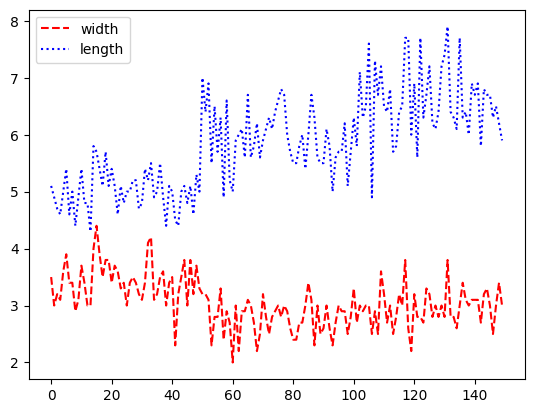

In [ ]:
import matplotlib.pyplot as plt
plt.plot(width, 'r--', label='width')
plt.plot(length, 'b:', label='length')
plt.legend()
plt.show()

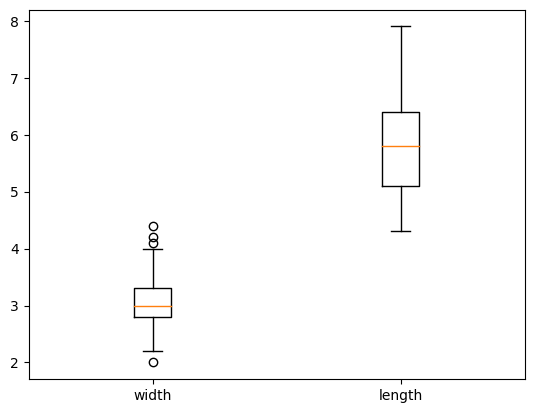

In [ ]:
plt.boxplot([width, length], labels=['width','length'])
plt.show()

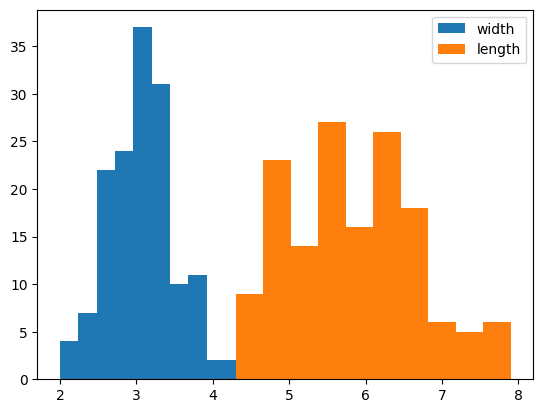

In [ ]:
plt.hist(width, label='width')
plt.hist(length, label='length')
plt.legend()
plt.show()

### 2. iris 꽃잎의 길이와 너비를 산포도로 그리기

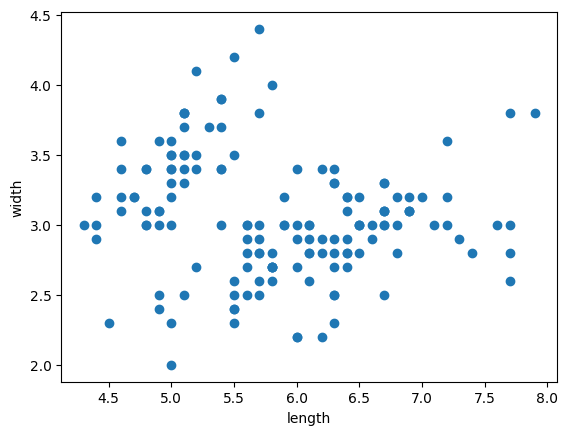

In [ ]:
plt.scatter(length, width)
plt.xlabel('length')
plt.ylabel('width')
plt.show()

### 3. setosa 품종 꽃잎의 길이의 평균과 너비의 평균을 파이차트로 그리기
1. 만약 품종이 'setosa'라면 petal_length와 petal_width 값을 실수로 변환하여 length, width 리스트에 반복하여 추가한다.
1. length의 평균과 width의 평균을 구한다.
1. pie() 함수를 이용하여 차트를 그린다.

In [ ]:
width = []
length = []
for row in data :
  if row[5] == 'setosa' :
    width.append(float(row[4]))
    length.append(float(row[3]))

width_avg = sum(width)/len(width)
length_avg = sum(length)/len(length)

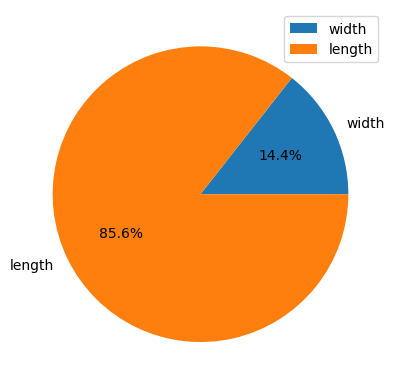

In [ ]:
import matplotlib.pyplot as plt
plt.pie([width_avg, length_avg], labels=['width', 'length'],
        autopct='%.1f%%')
plt.legend()
plt.show()

### 4. iris 꽃잎의 길이와 너비를 품종별로 산포도로 그리기
1. 3개의 빈 리스트를 포함하는 width, length 리스트를 초기화한다.
1. 만약 species가 'setosa'라면 0번째, 'versicolor'라면 1번째, 그게 아니면 2번째 리스트에 길이와 너비를 실수로 변환하여 저장한다.
1. scatter() 함수를 3번 사용하여 각 품종별 산포도를 그려준다.

In [ ]:
width = [[],[],[]]
length = [[],[],[]]
for row in data :
  if row[5] == 'setosa' :
    width[0].append(float(row[2]))
    length[0].append(float(row[1]))
  elif row[5] == 'versicolor' :
    width[1].append(float(row[2]))
    length[1].append(float(row[1]))
  else :
    width[2].append(float(row[2]))
    length[2].append(float(row[1]))

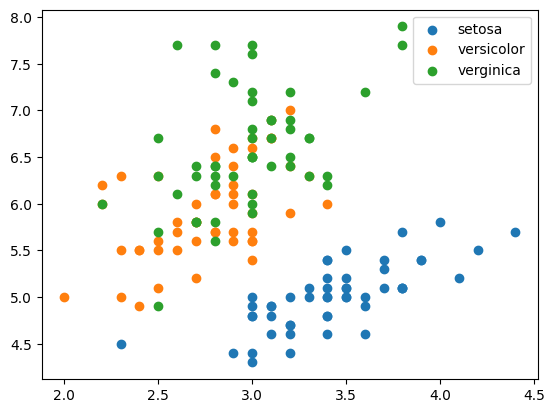

In [ ]:
plt.scatter(width[0], length[0], label='setosa')
plt.scatter(width[1], length[1], label='versicolor')
plt.scatter(width[2], length[2], label='verginica')
plt.legend()
plt.show()

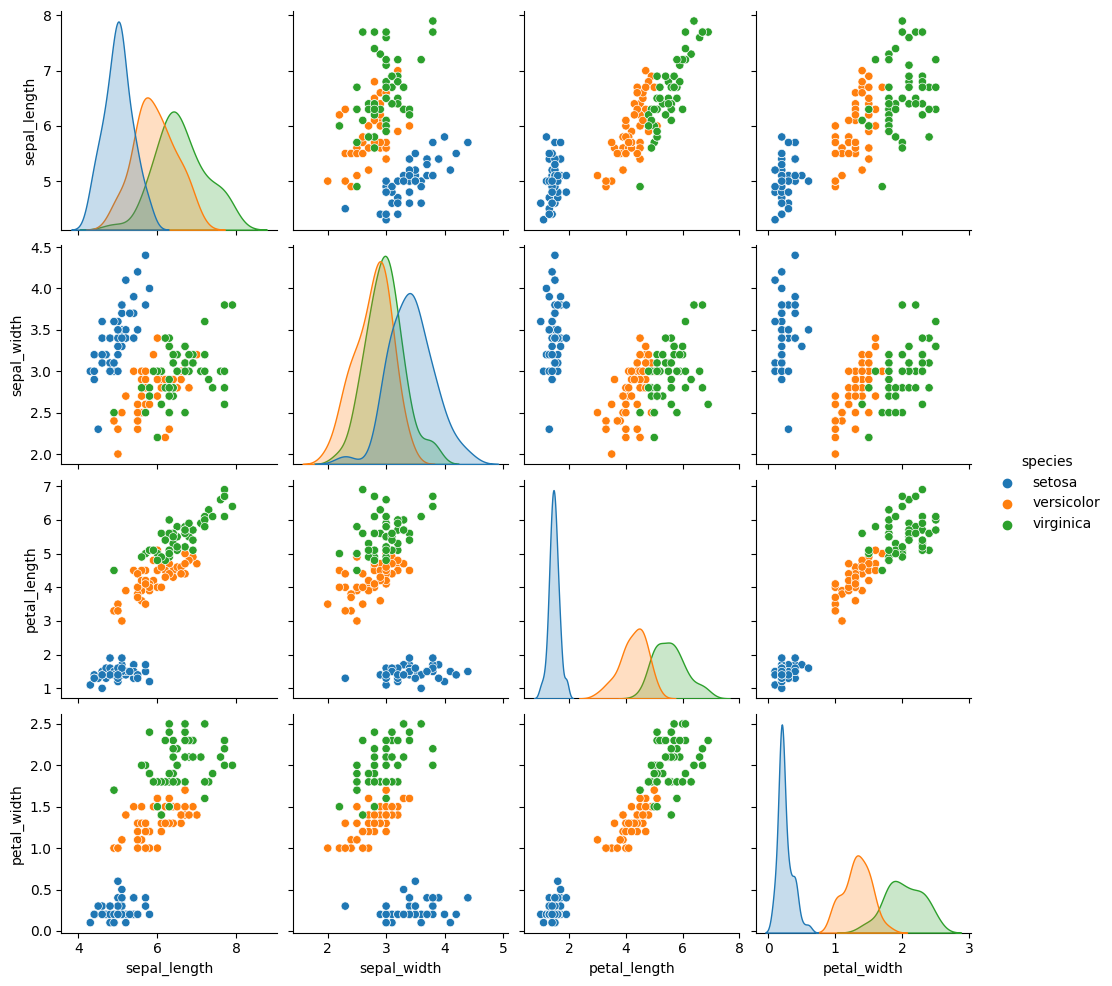

In [ ]:
# 참고 : seaborn의 놀라운 차트 능력
import seaborn as sns
i = sns.load_dataset('iris')
sns.pairplot(i, hue='species')
plt.show()

## pandas, seaborn 사용

### 데이터 불러오기

In [1]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
# 금액과 팁의 상관계수
tips[['total_bill','tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


### pandas 라인 차트
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot

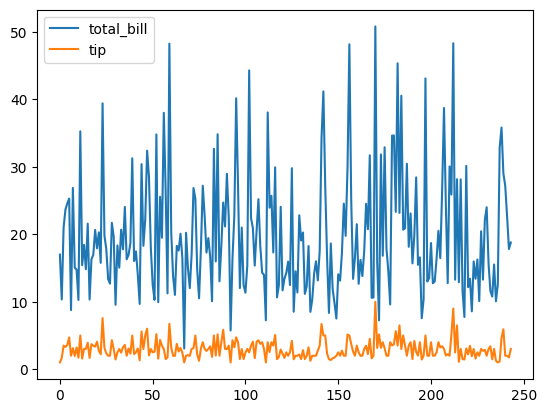

In [ ]:
import matplotlib.pyplot as plt
tips[['total_bill','tip']].plot()
plt.show()

### seaborn box/violin 차트
- https://seaborn.pydata.org/index.html

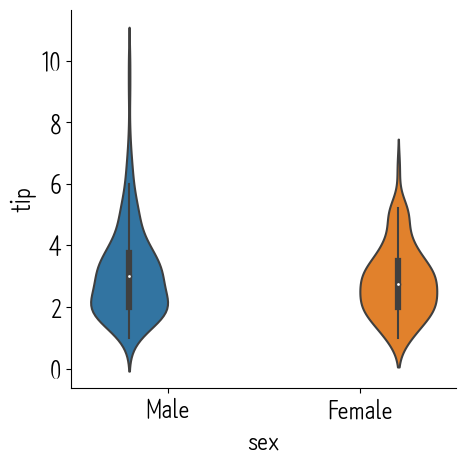

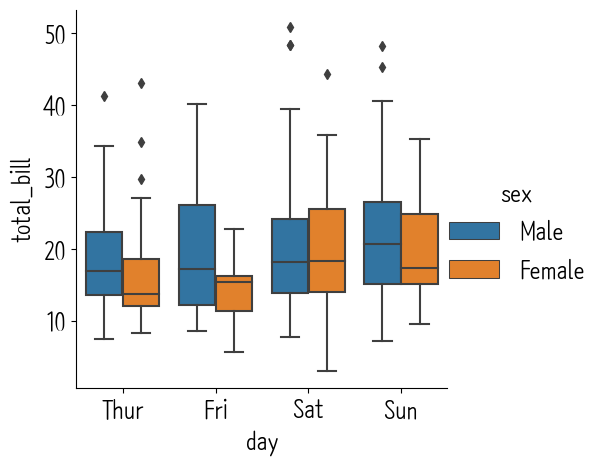

In [ ]:
sns.catplot(data=tips, x='sex', y='tip', hue='sex', kind='violin')
sns.catplot(data=tips, x='day', y='total_bill', hue='sex', kind='box')
plt.show()

### pandas 히스토그램

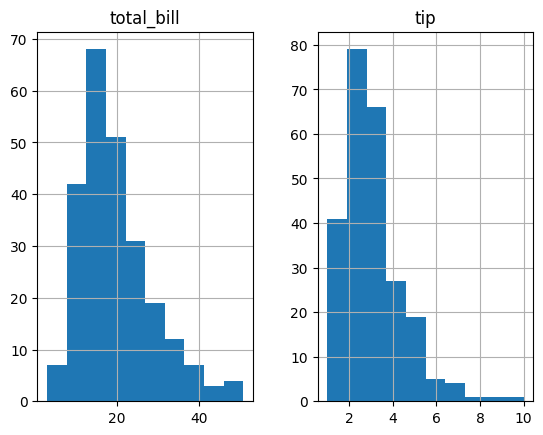

In [ ]:
tips[['total_bill','tip']].hist()
plt.show()

### seaborn 히스토그램

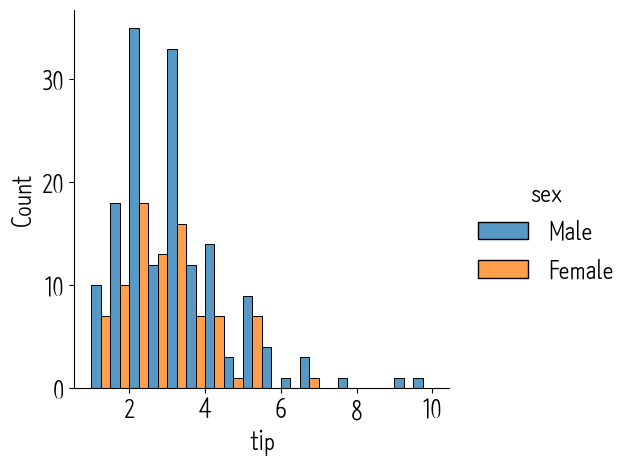

In [ ]:
sns.displot(data=tips, x='tip', hue='sex', multiple='dodge')
plt.show()

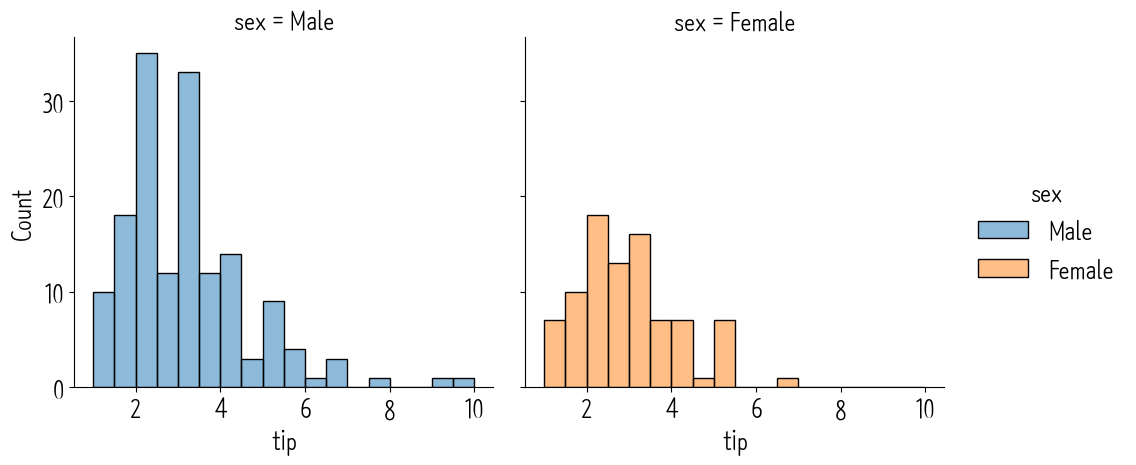

In [ ]:
sns.displot(data=tips, x='tip', hue='sex', col='sex')
plt.show()

### pandas 가로막대 차트

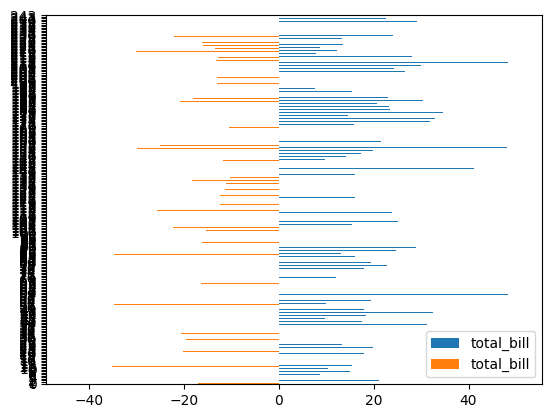

In [ ]:
import pandas as pd
m = tips[tips['sex']=='Male']['total_bill']
f = -tips[tips['sex']=='Female']['total_bill']
pd.concat([m,f], axis=1).sort_index().plot(kind='barh')
plt.show()

### pandas 산점도

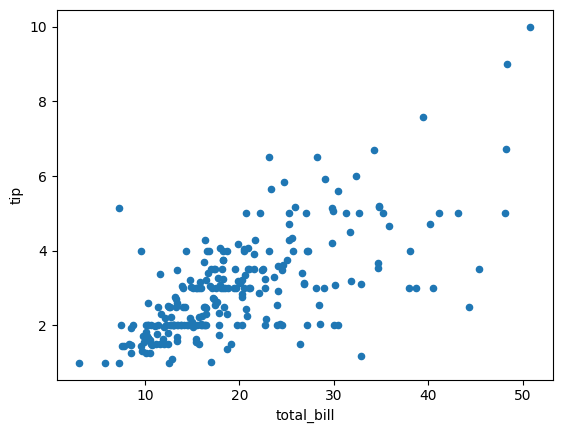

In [ ]:
tips[['total_bill','tip']].plot(kind='scatter', x='total_bill',y='tip')
plt.show()

### seaborn 성별 산점도

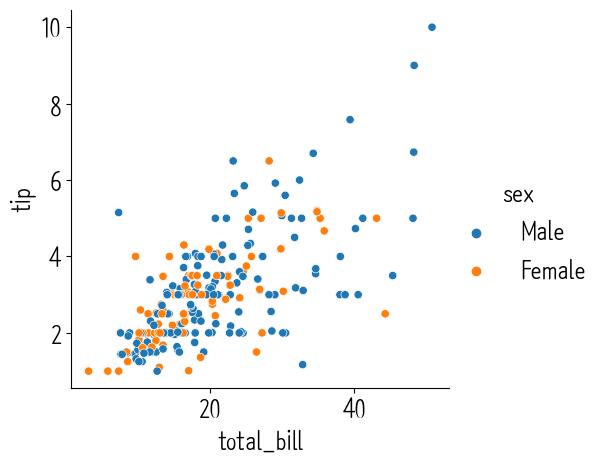

In [ ]:
import seaborn as sns
sns.relplot(data=tips,x='total_bill',y='tip',hue='sex')
plt.show()

### seaborn 회귀 차트

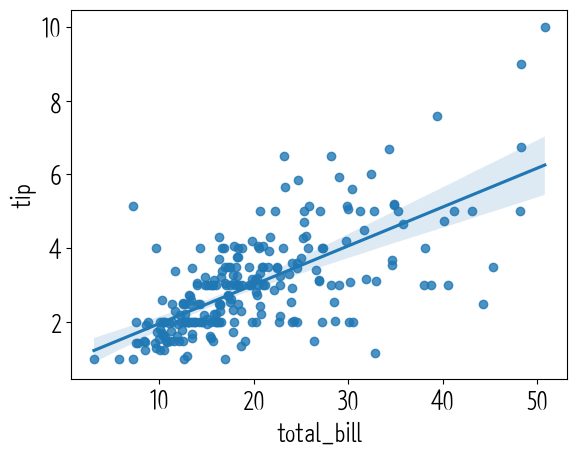

In [ ]:
import seaborn as sns
sns.regplot(data=tips,x='total_bill',y='tip')
plt.show()

### pandas 파이 차트

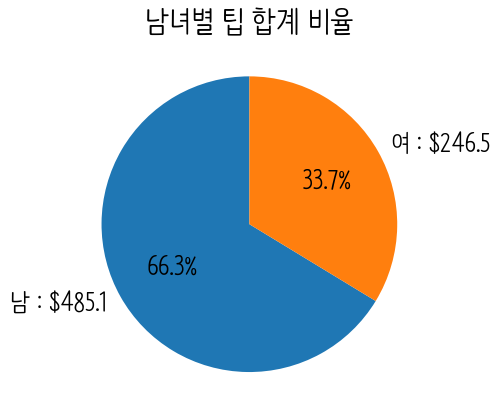

In [ ]:
msum = tips[tips['sex']=='Male'].tip.sum()
fsum = tips[tips['sex']=='Female'].tip.sum()
plt.title('남녀별 팁 합계 비율')
plt.pie([msum, fsum], labels=['남 : $'+f'{msum:.1f}','여 : $'+f'{fsum:.1f}'],
        autopct='%.1f%%', startangle=90)
plt.show()

In [ ]:
tips.groupby('sex').mean('tip')

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


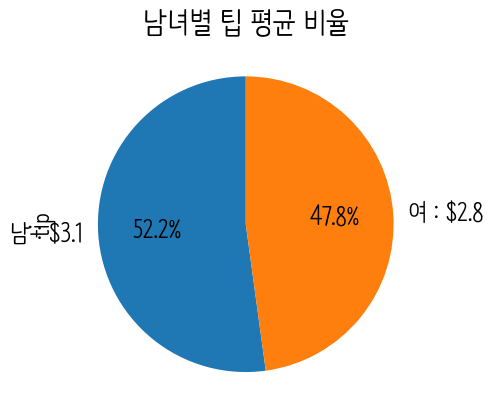

In [ ]:
total = tips.groupby('sex').mean('tip')
total.plot(y='tip', kind='pie',
        labels=['남 : $'+f'{total.iloc[0,1]:.1f}','여 : $'+f'{total.iloc[1,1]:.1f}'],
        legend=False, title='남녀별 팁 평균 비율', autopct='%.1f%%', startangle=90)
plt.show()

### 집계 - crosstab, groupby, value_counts()

In [ ]:
import pandas as pd
pd.crosstab(index=[tips.sex, tips.day], columns=[tips.time, tips.smoker], margins=True)

time        Lunch     Dinner       All
smoker        Yes  No    Yes   No     
sex    day                            
Male   Thur    10  20      0    0   30
       Fri      3   0      5    2   10
       Sat      0   0     27   32   59
       Sun      0   0     15   43   58
Female Thur     7  24      0    1   32
       Fri      3   1      4    1    9
       Sat      0   0     15   13   28
       Sun      0   0      4   14   18
All            23  45     70  106  244

In [ ]:
tips.groupby(['sex','day']).sum()

<ipython-input-15-d1f70aa43eac>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby(['sex','day']).sum()


total_bill     tip  size
sex    day                           
Male   Thur      561.44   89.41    73
       Fri       198.57   26.93    21
       Sat      1227.35  181.95   156
       Sun      1269.46  186.78   163
Female Thur      534.89   82.42    79
       Fri       127.31   25.03    19
       Sat       551.05   78.45    63
       Sun       357.70   60.61    53

<Axes: ylabel='sex,day,time'>

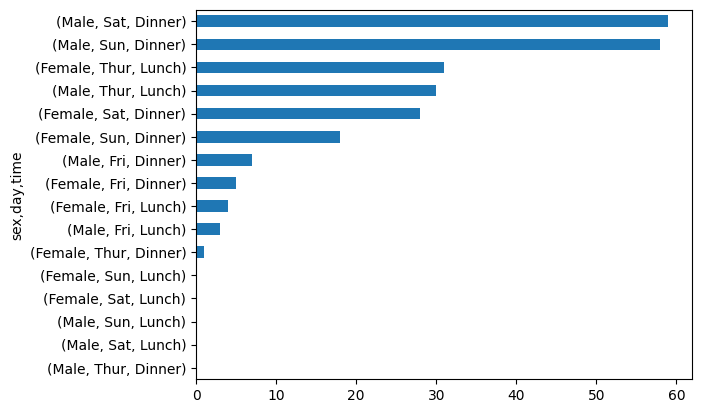

In [8]:
tips[['sex','day','time']].groupby('sex').value_counts().sort_values().plot(kind='barh')

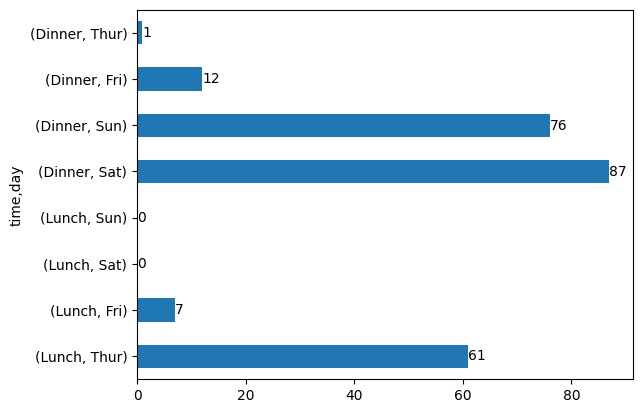

In [23]:
# https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html#matplotlib.axes.Axes.bar_label
import matplotlib.pyplot as plt
ax = tips[['day','time']].groupby('time').value_counts().plot(kind='barh')
plt.bar_label(ax.containers[0])
plt.show()

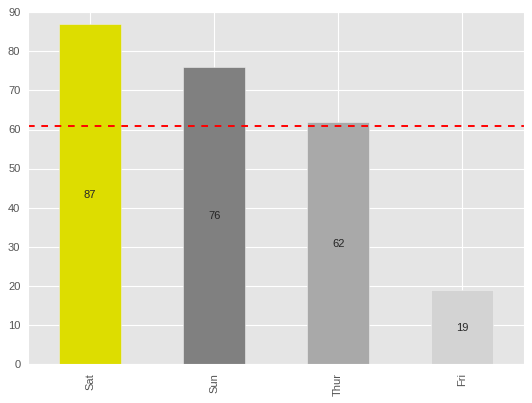

In [55]:
import matplotlib.pyplot as plt
# 차트 스타일 지정
plt.style.use('ggplot')
# 요일별 평균 개수 구하기
avg = tips['day'].value_counts().mean()
# 막대 색상 지정
colors = ['#dddd00','gray','darkgray','lightgray']
# 막대차트 그리기
ax = tips['day'].value_counts().plot(kind='bar', color=colors)
# 평균 가로선 그리기
ax.axhline(avg, ls='--', color='r')
# 데이터레이블 넣기
plt.bar_label(ax.containers[0], label_type='center')
plt.show()

In [45]:
import seaborn as sns
tips = sns.load_dataset('tips')